In [1]:
#import zakladnych kniznic
import pandas as pd
import numpy as np

In [2]:
#nacitanie datasetu
dataset = pd.read_csv('breast_cancer_prediction.csv')
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
#predpriprava na test a odstranenie duplicit a zmena hodnot stlpca 'Class' z 2 a 4 na 0 a 1 
#0 -> nezhubna
#1 -> zhubna

dataset = dataset.iloc[:,1:]
dataset['Class'].replace({2: 0, 4: 1}, inplace=True)
dataset

C:\Users\alena\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


In [4]:
#zistovania poctu duplicit
dataset.duplicated().sum()

234

In [5]:
#odstránenie duplicit a nasledna kontrola
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [6]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,0.525612
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.499901
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


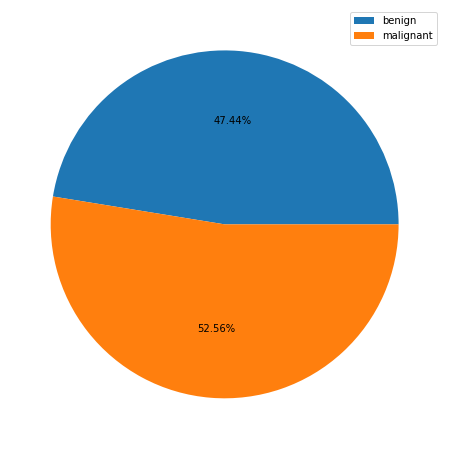

In [7]:
#vizualizacia pomeru poctu pacientok s rakovinou zhubnej a poctu pacientok s rakovinou nezhubnej triedy

import matplotlib.pyplot as plt
class_count = dataset['Class'].value_counts()
data = np.array([class_count[0],class_count[1]])
labels = ['benign', 'malignant']
fig1, ax1 = plt.subplots(figsize=(8,8))

ax1.pie(data,autopct='%.2f%%')
plt.legend(labels=labels)
plt.show()   

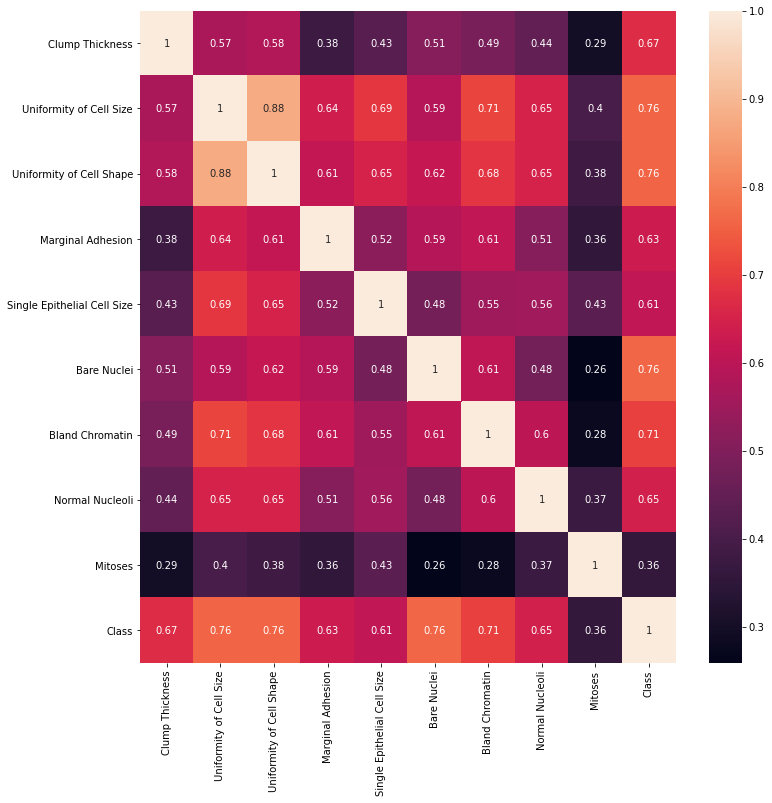

In [8]:
#vizualizacia korelacie

import seaborn as sb
corrMatrix = dataset.corr()
plt.subplots(figsize=(12,12))
sb.heatmap(corrMatrix, annot=True)
plt.show()

Na predchádzajúcom grafe môžeme vidieť, že stĺpec "Class" najviac lineárne koreluje so stĺpcami "Uniformity of Cell Size", "Uniformity of Cell Shape", "Bare Nuclei" a "Bland Chromatin", preto si tieto stĺpce ďalej vizualizujeme.

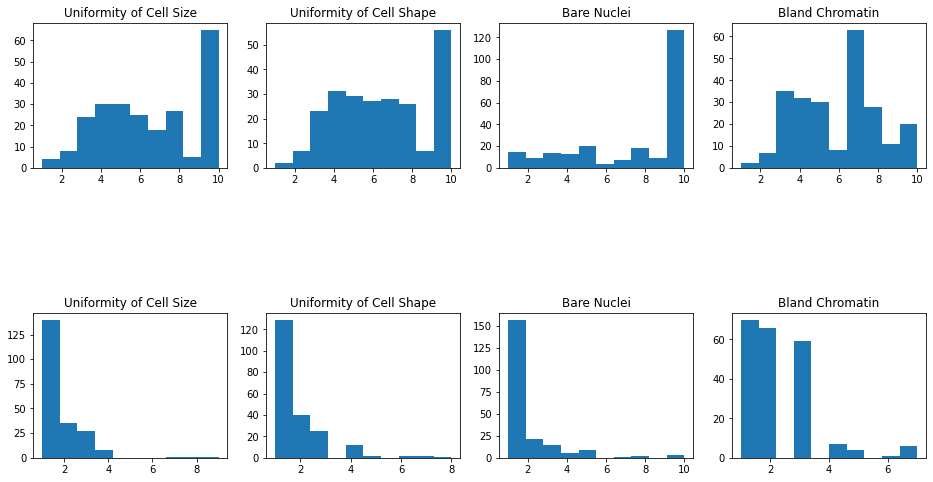

In [9]:
#vizualizacia relevantnych stlpcov pre "Class" == 1
#teda pocty pacientok so zhubnou rakovinou pre jednotlive hodnoty v danych stlpcoch - histogramy

malignant = dataset.loc[(dataset['Class'] == 1)]

fig, ax = plt.subplots(2,4,figsize=(16, 8) )

i = 0

col_m = malignant.columns[1:3]
col_m = col_m.append(malignant.columns[5:7])

for c in col_m:
    ax[0,i].hist(malignant[c])
    ax[0,i].set_title(c)
    i = i + 1

#vizualizacia relevantnych stlpcov pre "Class" == 2
#teda pocty pacientok szhubnou rakovinou pre jednotlive hodnoty v danych stlpcoch - histogramy    
    
benign = dataset.loc[(dataset['Class'] == 0)]

col_b = benign.columns[1:3]
col_b = col_b.append(benign.columns[5:7])

i = 0

for c in col_b:
    ax[1,i].hist(benign[c])
    ax[1,i].set_title(c)
    i = i + 1

fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()

<AxesSubplot:xlabel='Bland Chromatin', ylabel='Count'>

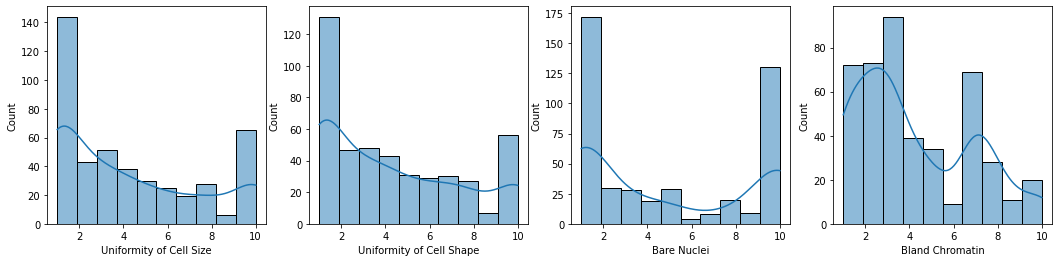

In [10]:
#vizualizacia relevantnych stlpcov pre vsetky data - histogamy

fig, axes = plt.subplots(1,4, figsize=(18,4))
sb.histplot(dataset['Uniformity of Cell Size'], bins=10, kde=True, ax=axes[0])
sb.histplot(dataset['Uniformity of Cell Shape'], bins=10, kde=True, ax=axes[1])
sb.histplot(dataset['Bare Nuclei'], bins=10, kde=True, ax=axes[2])
sb.histplot(dataset['Bland Chromatin'], bins=10, kde=True, ax=axes[3])

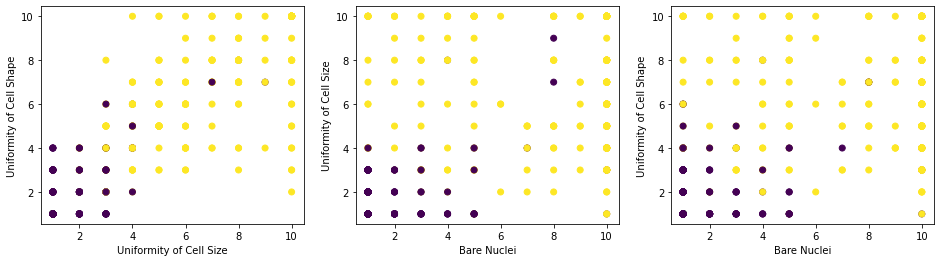

In [11]:
fig, ax = plt.subplots(1,3,figsize=(16, 4) )
ax[0].scatter(dataset['Uniformity of Cell Size'], dataset['Uniformity of Cell Shape'], c = dataset['Class'])
ax[0].set_xlabel('Uniformity of Cell Size')
ax[0].set_ylabel('Uniformity of Cell Shape')
ax[1].scatter(dataset['Bare Nuclei'], dataset['Uniformity of Cell Size'], c = dataset['Class'])
ax[1].set_xlabel('Bare Nuclei')
ax[1].set_ylabel('Uniformity of Cell Size')
ax[2].scatter(dataset['Bare Nuclei'], dataset['Uniformity of Cell Shape'], c = dataset['Class'])
ax[2].set_xlabel('Bare Nuclei')
ax[2].set_ylabel('Uniformity of Cell Shape')

plt.show()

In [12]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x =dataset['Uniformity of Cell Size']
# y =dataset['Uniformity of Cell Shape']
# z =dataset['Bare Nuclei']

# scatter=ax.scatter(x, y, z, c=dataset['Class'], marker='o')

# ax.set_xlabel('Uniformity of Cell Size')
# ax.set_ylabel('Uniformity of Cell Shape')
# ax.set_zlabel('Bare Nuclei')

# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="upper right", title="Class")
# ax.add_artist(legend1)

# #fig.suptitle('')

# plt.show()

In [13]:
#rozdelenie dat

y = dataset.iloc[:,9].values
X = dataset.iloc[:,0:8].values

In [14]:
X[:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2],
       [ 3,  1,  1,  1,  2,  2,  3,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7],
       [ 4,  1,  1,  3,  2,  1,  3,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7],
       [ 1,  1,  1,  1,  2, 10,  3,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1],
       [ 4,  2,  1,  1,  2,  1,  2,  1]], dtype=int64)

In [15]:
y[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [16]:
#rozdelenie dat na testovacie a trenovacie pomocou train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train[:10]

array([[ 7,  8,  7,  6,  4,  3,  8,  8],
       [ 3,  1,  4,  1,  2,  1,  1,  1],
       [ 5,  1,  1,  1,  2,  2,  3,  3],
       [ 1,  1,  1,  1, 10,  1,  1,  1],
       [ 6,  1,  3,  1,  2,  1,  3,  1],
       [ 1,  1,  1,  3,  2,  1,  1,  1],
       [ 6,  1,  1,  3,  2,  1,  1,  1],
       [ 5,  1,  1,  1,  1,  1,  1,  1],
       [ 8,  4,  4,  5,  4,  7,  7,  8],
       [ 8,  7,  8,  5, 10, 10,  7,  2]], dtype=int64)

In [18]:
X_test[:10]

array([[ 3,  2,  1,  1,  2,  1,  2,  2],
       [ 3,  3,  2,  6,  3,  3,  3,  5],
       [ 3,  1,  1,  1,  3,  1,  2,  1],
       [ 3,  6,  4, 10,  3,  3,  3,  4],
       [ 5,  3,  1,  2,  2,  1,  2,  1],
       [10,  7,  7,  3,  8,  5,  7,  4],
       [ 4,  1,  1,  1,  2,  1,  3,  6],
       [ 3,  3,  6,  4,  5,  8,  4,  4],
       [ 7,  5,  6, 10,  4, 10,  5,  3],
       [ 6,  6,  7, 10,  3, 10,  8, 10]], dtype=int64)

In [19]:
y_train[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [20]:
y_test[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [21]:
#skalovanie hodnot X

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train[:10]

array([[ 0.52258049,  1.13198167,  0.88431621,  0.69674012,  0.03136925,
        -0.50568323,  1.3300935 ,  1.19021462],
       [-0.88591972, -1.00923667, -0.09341368, -0.89784003, -0.78945953,
        -1.02205569, -1.25026441, -0.82993344],
       [-0.18166961, -1.00923667, -1.07114357, -0.89784003, -0.78945953,
        -0.76386946, -0.51301929, -0.25274828],
       [-1.59016982, -1.00923667, -1.07114357, -0.89784003,  2.49385559,
        -1.02205569, -1.25026441, -0.82993344],
       [ 0.17045544, -1.00923667, -0.41932365, -0.89784003, -0.78945953,
        -1.02205569, -0.51301929, -0.82993344],
       [-1.59016982, -1.00923667, -1.07114357, -0.26000797, -0.78945953,
        -1.02205569, -1.25026441, -0.82993344],
       [ 0.17045544, -1.00923667, -1.07114357, -0.26000797, -0.78945953,
        -1.02205569, -1.25026441, -0.82993344],
       [-0.18166961, -1.00923667, -1.07114357, -0.89784003, -1.19987391,
        -1.02205569, -1.25026441, -0.82993344],
       [ 0.87470554, -0.09157167

In [23]:
X_test[:10]

array([[-0.88591972, -0.70334834, -1.07114357, -0.89784003, -0.78945953,
        -1.02205569, -0.88164185, -0.54134086],
       [-0.88591972, -0.39746   , -0.74523361,  0.69674012, -0.37904514,
        -0.50568323, -0.51301929,  0.32443688],
       [-0.88591972, -1.00923667, -1.07114357, -0.89784003, -0.37904514,
        -1.02205569, -0.88164185, -0.82993344],
       [-0.88591972,  0.520205  , -0.09341368,  1.97240423, -0.37904514,
        -0.50568323, -0.51301929,  0.0358443 ],
       [-0.18166961, -0.39746   , -1.07114357, -0.578924  , -0.78945953,
        -1.02205569, -0.88164185, -0.82993344],
       [ 1.57895565,  0.82609334,  0.88431621, -0.26000797,  1.67302681,
         0.01068924,  0.96147094,  0.0358443 ],
       [-0.53379466, -1.00923667, -1.07114357, -0.89784003, -0.78945953,
        -1.02205569, -0.51301929,  0.61302946],
       [-0.88591972, -0.39746   ,  0.55840624,  0.05890806,  0.44178364,
         0.78524794, -0.14439673,  0.0358443 ],
       [ 0.52258049,  0.21431667

In [24]:
#trenovanie modelu na 30 epoch
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])                 
visualisation = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 35ms/step - loss: 0.7321 - accuracy: 0.5475 - val_loss: 0.6860 - val_accuracy: 0.6741
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.7376 - val_loss: 0.6230 - val_accuracy: 0.8593
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.8043 - val_loss: 0.5573 - val_accuracy: 0.9037
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.9005 - val_loss: 0.5060 - val_accuracy: 0.9185
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.9147 - val_loss: 0.4664 - val_accuracy: 0.9333
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.9064 - val_loss: 0.4384 - val_accuracy: 0.9333
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.9155 - val_loss: 0.4176 - val_accuracy: 0.9333
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9579 - val_loss: 0.1652 - val_accuracy: 0.9704
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9672 - val_loss: 0.1640 - val_accuracy: 0.9704
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9627 - val_loss: 0.1625 - val_accuracy: 0.9704
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9837 - val_loss: 0.1614 - val_accuracy: 0.9704
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9661 - val_loss: 0.1600 - val_accuracy: 0.9704
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9590 - val_loss: 0.1589 - val_accuracy: 0.9704
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9759 - val_loss: 0.1579 - val_accuracy: 0.9630
Epoch 

In [25]:
#predikcia a jej presnost na testovacich datach

y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
score = np.array(score)
print('---------------------------------------------------------------------------------------')
print('loss: ',score[0] * 100,'%') 
print('accuracy: ',score[1] * 100,'%') 

5/5 [==============================] - 0s 985us/step - loss: 0.1365 - accuracy: 0.9630
---------------------------------------------------------------------------------------
loss:  13.652290403842926 %
accuracy:  96.29629850387573 %


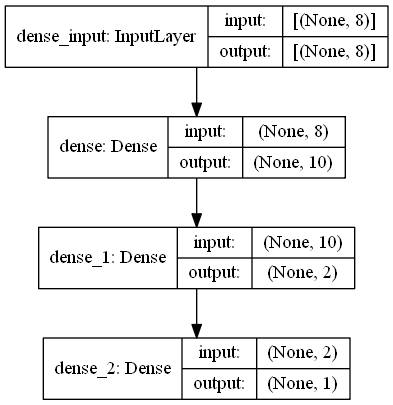

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

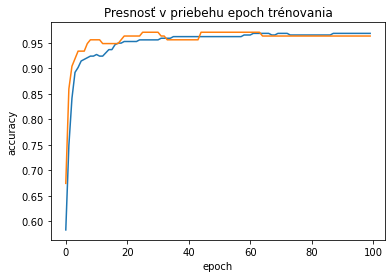

In [27]:
plt.plot(visualisation.history['accuracy'])
plt.plot(visualisation.history['val_accuracy'])
plt.title('Presnosť v priebehu epoch trénovania')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

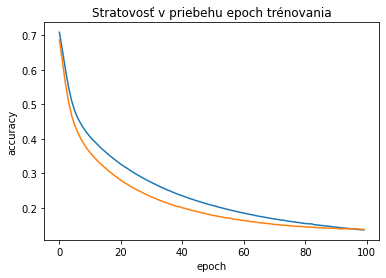

In [28]:
plt.plot(visualisation.history['loss'])
plt.plot(visualisation.history['val_loss'])
plt.title('Stratovosť v priebehu epoch trénovania')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [29]:
def predict(clump_thickness,uniformity_of_cell_size, uniformity_of_cell_shape, 
            marginal_adhesion, single_epithelial_cell_size, bare_nuclei, 
            bland_chromatin,normal_nucleoli):
    predict_df = pd.DataFrame({'Clump Thickness':int(clump_thickness), 
                               'Uniformity of Cell Size':int(uniformity_of_cell_size),
                               'Uniformity of Cell Shape':int(uniformity_of_cell_shape), 
                               'Marginal Adhesion':int(marginal_adhesion),
                               'Single Epithelial Cell Size':int(single_epithelial_cell_size), 
                               'Bare Nuclei':int(bare_nuclei), 
                               'Bland Chromatin':int(bland_chromatin),
                               'Normal Nucleoli':int(normal_nucleoli)}, index=[0]) 
                               #'Mitoses':int(mitoses)}, index=[0])
    X = scaler.transform(predict_df)
    prediction = (model.predict(X) > 0.5).astype("int32")
    score_percents = score * 100
    if(prediction[0]==1):
        return "Prediction: malignant"
    else:
        return "Prediction: benign"

In [30]:
# clump_thickness = input('Clump Thickness: ')
# uniformity_of_cell_size = input('Uniformity of Cell Size: ')
# uniformity_of_cell_shape = input('Uniformity of Cell Shape: ')
# marginal_adhesion = input('Marginal Adhesion: ')
# single_epithelial_cell_size = input('Single Epithelial Cell Size: ')
# bare_nuclei = input('Bare Nuclei: ')
# bland_chromatin = input('Bland Chromatin: ')
# normal_nucleoli = input('Normal Nucleoli: ')

In [31]:
# predict(clump_thickness,uniformity_of_cell_size, uniformity_of_cell_shape, marginal_adhesion, 
#         single_epithelial_cell_size, bare_nuclei, bland_chromatin,normal_nucleoli)